<a href="https://colab.research.google.com/github/Polgabarro/deep-learning-practices/blob/master/dppractica_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [0]:
fashion_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
print(train_images.shape)
print(test_images.shape)
print(train_labels[1])


(60000, 28, 28)
(10000, 28, 28)
0


(28, 28)


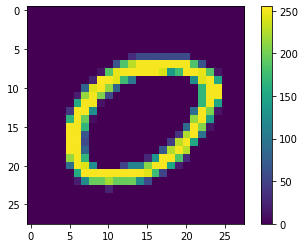

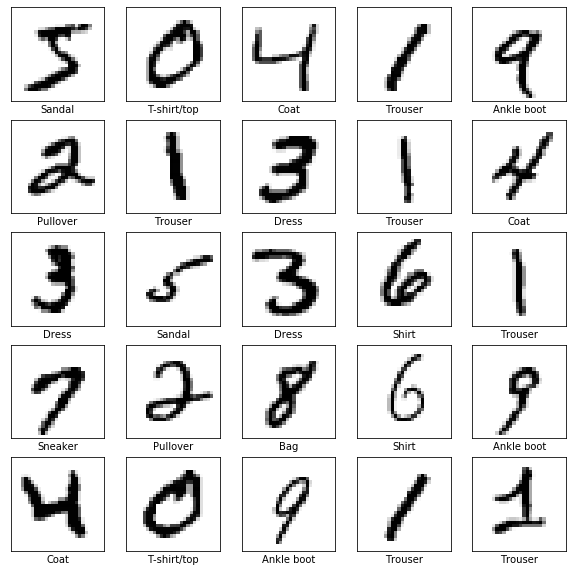

In [0]:
i = 156
plt.figure()
print(train_images[0].shape)
plt.imshow(train_images[i])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [0]:
ACCURACY_THRESHOLD = 0.998

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}):
              
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True
            
print(train_images.shape)
            
model.fit(train_images, train_labels, epochs=20, callbacks=[myCallback()])


(60000, 28, 28, 1)
Epoch 1/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1476 - accuracy: 0.9564
Epoch 2/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0522 - accuracy: 0.9838
Epoch 3/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0348 - accuracy: 0.9887
Epoch 4/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0234 - accuracy: 0.9927
Epoch 5/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0164 - accuracy: 0.9947
Epoch 6/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0106 - accuracy: 0.9966
Epoch 7/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0092 - accuracy: 0.9967
Epoch 8/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.0052 - accuracy: 0.9983
Reached 99.80% accuracy, so stopping training!!
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0052 - accuracy: 0.9983


In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0576 - accuracy: 0.9866

Test accuracy: 0.9865999817848206


**Testing the model**

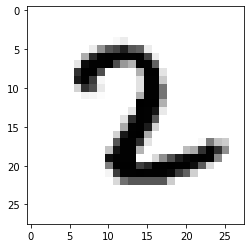

Predicted: Pullover
Real: Pullover
[[2.5857914e-12 1.1951911e-06 9.9999881e-01 1.8452278e-08 7.7211525e-14
  6.4927532e-18 1.0349435e-14 2.8884566e-09 3.1876346e-12 5.2457589e-15]]


In [0]:
img_number = 2133
img = test_images[img_number:img_number+1]

predictions = model.predict(img)

plt.figure()
plt.imshow(img[0].reshape(28,28), cmap=plt.cm.binary)
plt.grid(False)
plt.show()

print('Predicted:', class_names[np.argmax(predictions[0])])
print('Real:', class_names[test_labels[img_number]])
print(predictions)

**Testing the model using softmax**

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
  
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

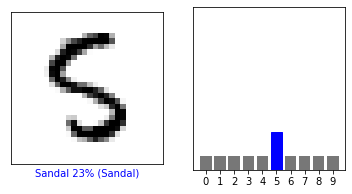

In [0]:
i = 1235
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images.reshape(10000 ,28, 28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

**Real test**

In [1]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *
from IPython.display import clear_output


width = 250  # canvas width
height = 250 # canvas height
center = height//2
white = (255, 255, 255) # canvas back

imageArray = np.array([])

def exit():
    master.destroy()


def clear():
    canvas.create_line((0, 0, 600, 600), fill='white', width=700)
    #  --- PIL
    draw.line((0, 0, 600, 600), fill='white', width=700)

    
def save():
    clear_output(wait=True)
    # save image to hard drive
    imageArray = np.array(output_image.resize((28, 28), PIL.Image.BILINEAR))
    greyedImage = np.dot(imageArray[...,:3], [1/3, 1/3, 1/3])
    greyedImage/= 255.0
    greyedImage = (greyedImage -1)*-1 
    img = np.array([greyedImage.reshape(28, 28, 1)])
    predictions = model.predict(img)

    plt.figure()
    plt.imshow(greyedImage, cmap=plt.cm.binary)
    plt.grid(False)
    plt.show()
    
    print('Predicted:', np.argmax(predictions[0]))

def activate_paint(e):
    global lastx, lasty
    canvas.bind('<B1-Motion>', paint)
    canvas.bind('<ButtonRelease-1>', reset)
    lastx, lasty = e.x, e.y


def paint(e):
    global lastx, lasty
    x, y = e.x, e.y
    if lastx and lasty:
        canvas.create_line((lastx, lasty, x, y), width=10, capstyle=ROUND, smooth=TRUE)
        #  --- PIL
        draw.line((lastx, lasty, x, y), fill='black', width=10)
    lastx, lasty = x, y

def reset(e):
    global lastx, lasty
    lastx, lasty = None, None
    
    
master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", activate_paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

button=Button(text="clear",command=clear)
button.pack()

button=Button(master, text="exit",command=exit)
button.pack()




master.mainloop()

NameError: ignored